# sentiment_analysis of social media app data

In [77]:
import pandas as pd
import numpy as nmp
import seaborn as sns
import nltk
import matplotlib.pyplot as plt 
import os

### loading the data set

In [ ]:
os.chdir('C:\\Users\\ganga\\OneDrive\\Documents\\cd\\')
df = pd.read_csv('twitter_training.csv')

### dataset display

In [4]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


### renaming and displaying the dataset

In [5]:
df.columns=['id','platform','sentiment','tweets']

In [6]:
df.head()

,id,platform,sentiment,tweets
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
df.shape

(74681, 4)

In [8]:
num_platforms = df['platform'].nunique()
platforms = df['platform'].unique()

print(f"Number of unique platforms: {num_platforms}")
print(f"Platforms involved: {platforms}")

Number of unique platforms: 32
Platforms involved: ['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']


In [9]:
df['tweets'][100]

'Grounded almost was pretty cool even despite the top tier unfunny writing until we became yet another annoying crafting game. I seriously can’t wait on this shitty trend to die'

<Axes: title={'center': 'proportion of the types of feedback'}, xlabel='sentiment'>

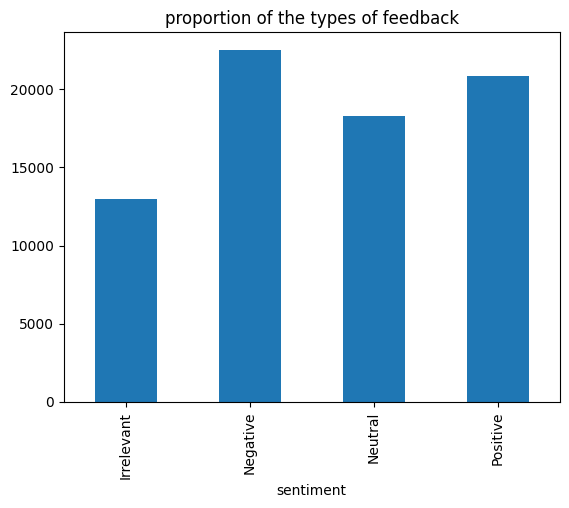

In [10]:
df['sentiment'].value_counts().sort_index().plot(kind='bar',title='proportion of the types of feedback')

#### sentiment analysis of the dataset using nltk 

In [12]:
tokens=nltk.word_tokenize(df['tweets'][100])

In [13]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ganga\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [15]:

tokens = word_tokenize(df['tweets'][100])
pos_tags = nltk.pos_tag(tokens)
print(pos_tags)

[('Grounded', 'VBD'), ('almost', 'RB'), ('was', 'VBD'), ('pretty', 'JJ'), ('cool', 'JJ'), ('even', 'RB'), ('despite', 'IN'), ('the', 'DT'), ('top', 'JJ'), ('tier', 'NN'), ('unfunny', 'JJ'), ('writing', 'VBG'), ('until', 'IN'), ('we', 'PRP'), ('became', 'VBD'), ('yet', 'RB'), ('another', 'DT'), ('annoying', 'VBG'), ('crafting', 'NN'), ('game', 'NN'), ('.', '.'), ('I', 'PRP'), ('seriously', 'RB'), ('can', 'MD'), ('’', 'VB'), ('t', 'JJ'), ('wait', 'NN'), ('on', 'IN'), ('this', 'DT'), ('shitty', 'JJ'), ('trend', 'NN'), ('to', 'TO'), ('die', 'VB')]


In [16]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ganga\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [17]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ganga\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [18]:
!pip install svgling

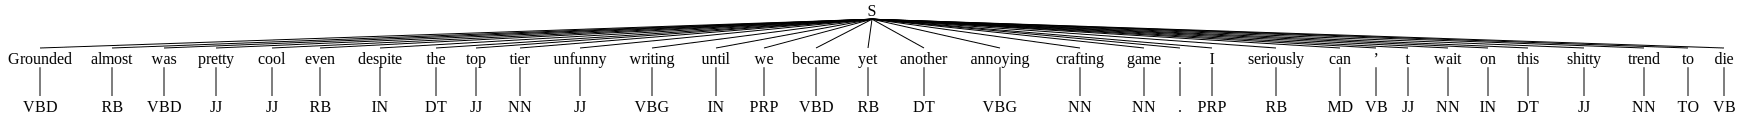

In [19]:
import nltk
nltk.chunk.ne_chunk(pos_tags)

In [20]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ganga\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia=  SentimentIntensityAnalyzer()

In [22]:
sentiment_scores = sia.polarity_scores(df['tweets'][100])
print(sentiment_scores)

{'neg': 0.344, 'neu': 0.535, 'pos': 0.121, 'compound': -0.8475}


In [23]:
sia.polarity_scores('this is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [24]:
sia.polarity_scores('i love this platform so much')

{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}

#### DISPLAYING THE POLARITY SCORES OF THE COMMENTS

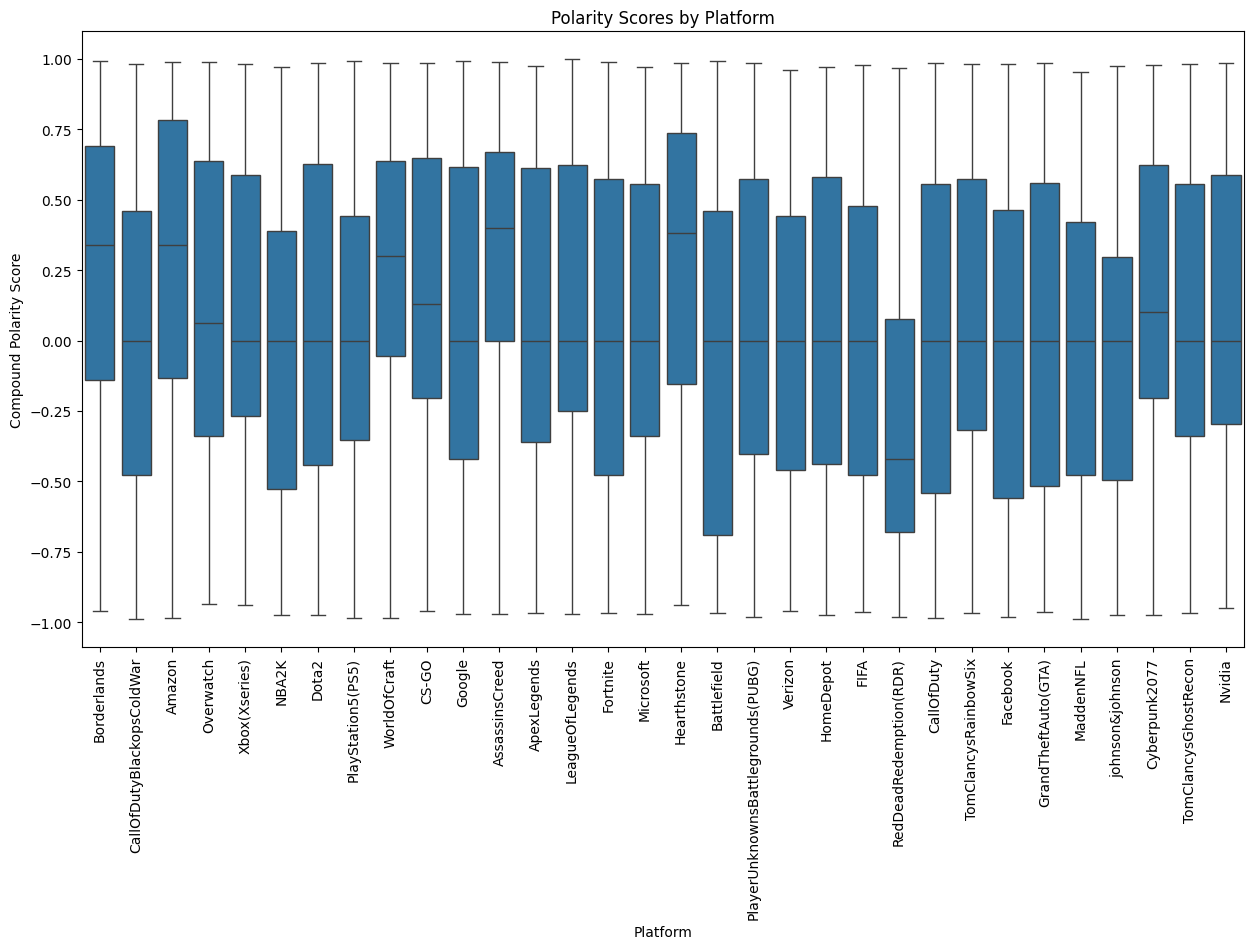

In [56]:
df['tweets'] = df['tweets'].astype(str)
df['compound'] = df['tweets'].apply(lambda tweet: sia.polarity_scores(tweet)['compound'])
plt.figure(figsize=(15, 8))
sns.boxplot(x='platform', y='compound', data=df)
plt.title('Polarity Scores by Platform')
plt.xlabel('Platform')
plt.ylabel('Compound Polarity Score')
plt.xticks(rotation=90)
plt.show()

In [37]:
res = {}
for index, row in tqdm(df.iterrows(), total=len(df)):
    text = row['tweets']
    myID = row['id']
    res[myID] = sia.polarity_scores(text)

100%|███████████████████████████████████████████████████████████████████████████████████████| 74681/74681 [00:22<00:00, 3309.61it/s]


In [61]:
res

{2401: {'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'compound': -0.6908},
 2402: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 2403: {'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'compound': 0.7531},
 2404: {'neg': 0.298, 'neu': 0.61, 'pos': 0.093, 'compound': -0.7939},
 2405: {'neg': 0.212, 'neu': 0.788, 'pos': 0.0, 'compound': -0.5423},
 2406: {'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.7494},
 2407: {'neg': 0.051, 'neu': 0.905, 'pos': 0.044, 'compound': -0.0772},
 2408: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 2409: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 2410: {'neg': 0.264, 'neu': 0.736, 'pos': 0.0, 'compound': -0.7269},
 2411: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 2412: {'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'compound': 0.8217},
 2413: {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.5106},
 2414: {'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'compound': 0.3786},
 2415: {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compo

In [46]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'id'})
vaders=vaders.merge(df,how='left')

In [48]:
#now we have the sentiment score and the original dataframe of tweets
vaders.head()

,id,neg,neu,pos,compound,platform,sentiment,tweets
0,2401,0.343,0.657,0.0,-0.6908,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,0.343,0.657,0.0,-0.6908,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,0.343,0.657,0.0,-0.6908,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,0.343,0.657,0.0,-0.6908,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,0.343,0.657,0.0,-0.6908,Borderlands,Positive,im getting into borderlands and i can murder y...


In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
vaders['sentiment_encoded'] = label_encoder.fit_transform(vaders['sentiment'])

In [51]:
vaders.head()

,id,neg,neu,pos,compound,platform,sentiment,tweets,sentiment_encoded
0,2401,0.343,0.657,0.0,-0.6908,Borderlands,Positive,I am coming to the borders and I will kill you...,3
1,2401,0.343,0.657,0.0,-0.6908,Borderlands,Positive,im getting on borderlands and i will kill you ...,3
2,2401,0.343,0.657,0.0,-0.6908,Borderlands,Positive,im coming on borderlands and i will murder you...,3
3,2401,0.343,0.657,0.0,-0.6908,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,3
4,2401,0.343,0.657,0.0,-0.6908,Borderlands,Positive,im getting into borderlands and i can murder y...,3


#### checking and comparing the compound score match with the sentiment which is already given in the datset

Text(0.5, 1.0, 'Compound score by the platform reviews')

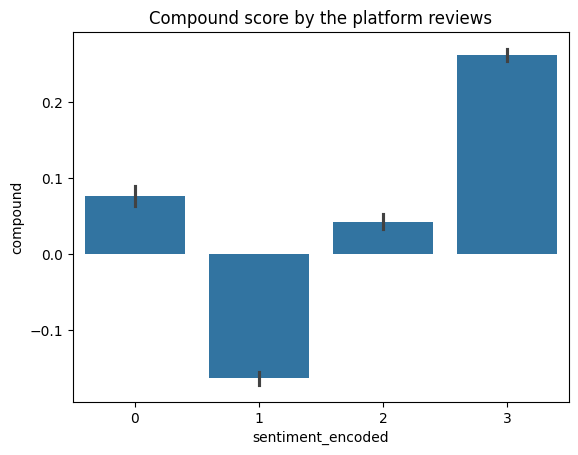

In [54]:
sns.barplot(data=vaders, x='sentiment_encoded', y='compound')
plt.title('Compound score by the platform reviews')

#### plotting the corr matrix between the compound score and sentiment_encoded

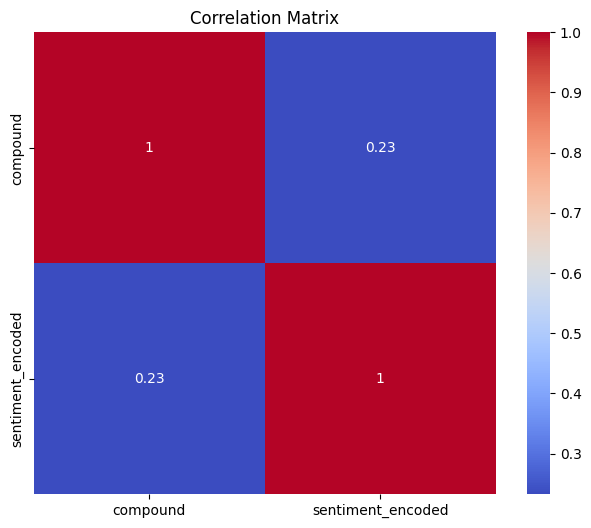

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = vaders[['compound', 'sentiment_encoded']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

#### distribution of the compound score for each platform

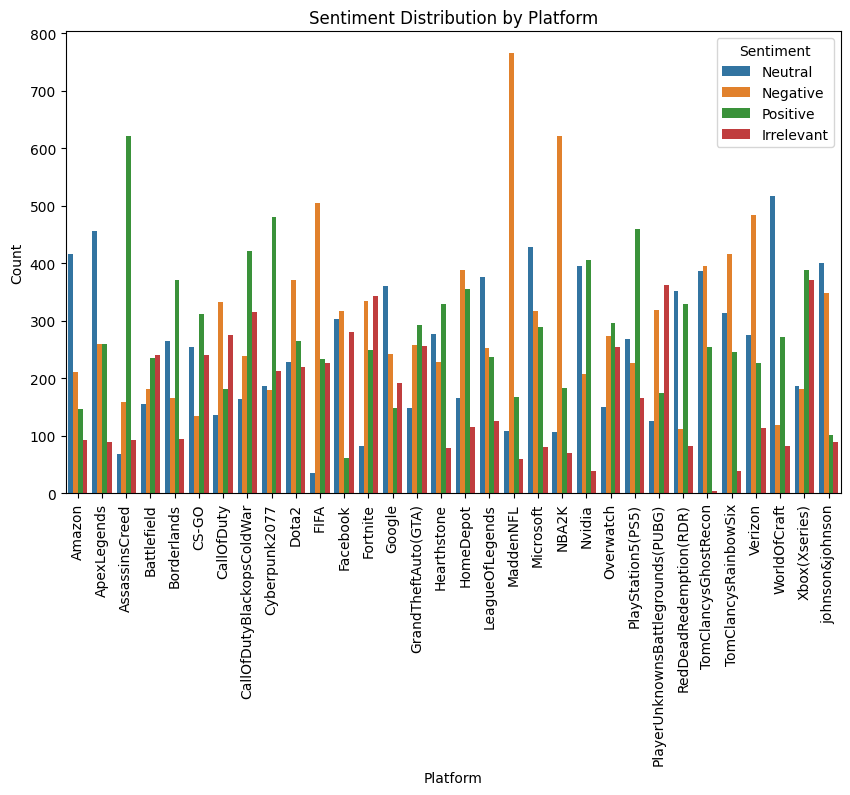

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
platform_sentiment_counts = vaders.groupby('platform')['sentiment'].value_counts().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='count', hue='sentiment', data=platform_sentiment_counts)
plt.title('Sentiment Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=90)
plt.show()

##### 